# Q & A

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/Lab-14.Q&A.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from mpl_toolkits import mplot3d
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Precision and recall

In machine learning, precision and recall are two important metrics used to evaluate the performance of a classifier. They are often used in binary classification problems, where the goal is to classify instances into one of two classes: positive or negative.

**Precision** is the fraction of true positives (TP) out of all positive predictions (TP + FP). In other words, it measures how often the classifier correctly predicted the positive class.

$$Precision = \frac{TP}{TP+FP} $$
​	
**Recall** is the fraction of true positives (TP) out of all actual positive instances (TP + FN). In other words, it measures how often the classifier correctly identified the positive instances.
$$Recall = \frac{TP}{TP+FN}
$$

### Example

Let's consider an example to illustrate precision and recall. Suppose we have a binary classifier that is used to predict whether a patient has a certain disease. The classifier produces the following confusion matrix:


|| Actual Positive |Actual Negative|
|---|---|---| 
Predicted Positive | 20 (TP) | 10 (FP)         
Predicted Negative | 5 (FN)  |65 (TN)        



From the confusion matrix, we can calculate precision and recall as follows:

$Precision = \frac{20}{20+10} = 0.67 $

$Recall = \frac{20}{20+5} = 0.8 $

### Interpretation

Precision and recall are both important metrics for evaluating the performance of a classifier, and they have different interpretations depending on the problem at hand.

Precision is a measure of how many of the predicted positives are actually positive. It is useful in situations where we want to minimize false positives, such as in medical diagnosis, where a false positive could lead to unnecessary treatment or surgery.   
Recall is a measure of how many of the actual positives were correctly identified. It is useful in situations where we want to minimize false negatives, such as in fraud detection, where a false negative could result in a significant loss.

## PCA graphs
Short for principal component analysis, PCA is a way to bring out strong patterns from large and complex datasets. 

The iris dataset is a popular dataset for demonstrating various machine learning techniques. It contains measurements of the sepal length, sepal width, petal length, and petal width for 150 iris flowers, with 50 flowers from each of three different species: Setosa, Versicolor, and Virginica.

In [ ]:
iris = datasets.load_iris()
 
# load features and targets 
X = iris.data
y = iris.target

target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df = pd.DataFrame(X, columns=iris.feature_names)
 
df['target'] = y
df['target_names'] = df['target'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# data scaling
x_scaled = StandardScaler().fit_transform(X)

We have seen that the Iris dataset contains 4 features, making it a 4-dimensional dataset.

Not all features are necessarily useful for the prediction. Therefore, we can remove those noisy features and make a faster model.

In [ ]:
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


In [ ]:
# prepare the PCA dataframe for visualization by mapping the target names to the PCA features.
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,PC3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa


The *explained variance*, or eigenvalue, in PCA shows the variance that can be attributed to each of the principal components.

It is an array of values where each value equals the variance of each principal component and the length of the array is equal to the number of components defined with `n_components`.

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

We can plot the explained variance to see the variance of each principal component feature.

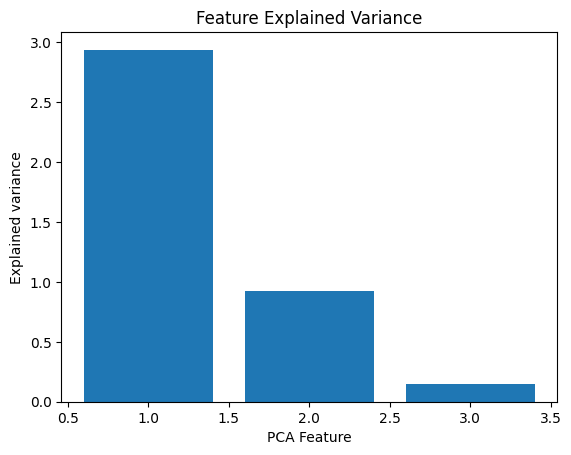

In [ ]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

The output graph shows that we do not need 3 features, but only 2. The 3rd feature’s variance is obviously not very significant.

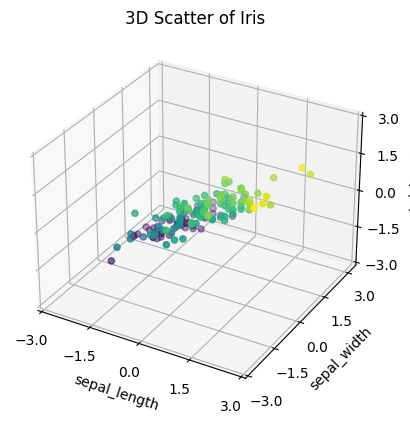

In [ ]:
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

When plotting a 3D graph, it is clearer that there is less variance in `Petal length` of Iris flowers than in `Sepal length` or `Sepal width`, almost making a flat 2D pane inside the 3D graph. That shows that the intrinsic dimension of the data is essentially 2 dimensions instead of 4.

Reducing these 3 features to 2 would not only make the model faster but the visualizations more informative without losing too much information.

Now, that we know that we only need 2 principal components, we will repeat all the steps we did before using `n_components=2`.

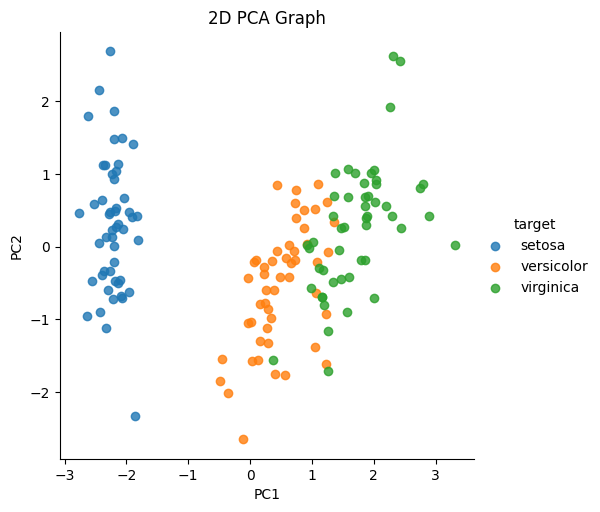

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
 
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

sns.lmplot( x='PC1', y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True)
 
plt.title('2D PCA Graph')
plt.show()

#### Loading plots

The loading plot shows vectors starting from the origin to the loadings of each feature. It helps understand which features impact which principal component and by how much. The loadings (or weights) are the correlation coefficients between the original features and the principal components. They represent the elements of the eigenvector. The loadings can be accessed using `pca.components_`. 

Squared loadings of the principal components are always equal to 1.

To understand how each feature impact each principal component (PC), we will show the correlation between the features and the principal components created with PCA.

In [ ]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = iris.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# dataframe with the loadings (correlation coefficients)
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df.head()

,PC1,PC2
feature_names,,
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


First, we plot the correlation coefficients (loadings) of each feature.
Then, we plot the directionality of the correlation by adding arrows from the origin $(0, 0)$ to each of the coefficients.

We will scale the PCA plot again to plot it against the loading plots. Using the loading plots and the scaled plots we can now show the correlation coefficients against the PCA scatterplot on the same graph.

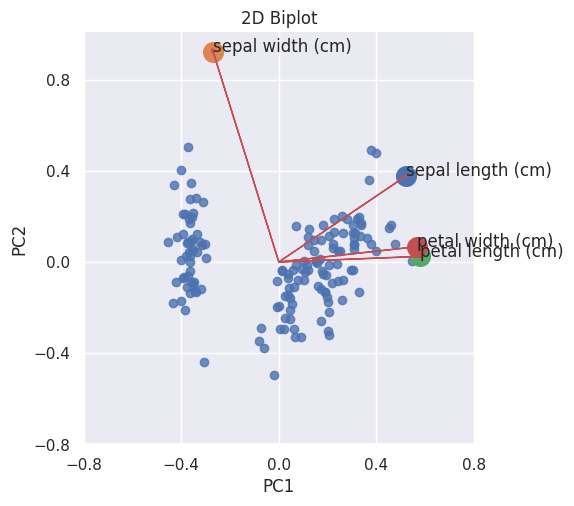

In [ ]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
    
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

* The location of the point on the plot shows how much that variable contributes to each principal component.

* The direction of the arrow extending from each variable point indicates the direction in which that variable has the most impact on the principal component. 

* The length of each arrow represents the strength of the variable's contribution to the principal component. Variables with longer arrows contribute more strongly to that principal component than variables with shorter arrows.

## t-SNE

[Useful link](https://distill.pub/2016/misread-tsne/)


T-Distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique used for visualising high-dimensional data in lower dimensions.

* It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. The KL divergence measures the amount of information lost when approximating one distribution with another. 

* A feature of t-SNE is a tuneable parameter, *perplexity*, which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.”. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

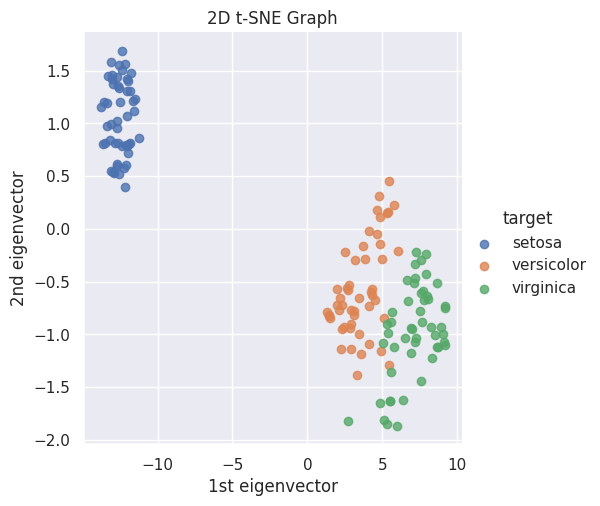

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, perplexity = 50, random_state=0) # perplexity default = 30
tsne_features = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=tsne_features, columns=['1st eigenvector', '2nd eigenvector'])
tsne_df['target'] = y
tsne_df['target'] = tsne_df['target'].map(target_names)

sns.lmplot(x='1st eigenvector', y='2nd eigenvector', data=tsne_df, hue='target', fit_reg=False, legend=True)
 
plt.title('2D t-SNE Graph')
plt.show()

* Data points that are close together in the t-SNE plot are more similar to each other in the high-dimensional space. This means that clusters of points in the t-SNE plot represent groups of data points that share similar characteristics. Conversely, points that are far apart in the t-SNE plot are less similar to each other in the high-dimensional space.
* The size and shape of the clusters in the t-SNE plot can provide information about the structure of the data. For example, if there are many small, tight clusters, this may indicate that the data contains many distinct groups. If there are few large, loose clusters, this may indicate that the data is relatively homogeneous.
* The t-SNE plot can be used to identify outliers or data points that do not fit well with the overall structure of the data. These points may appear far from any cluster or may form their own separate clusters.

### PCA vs t-SNE

| PCA | t-SNE |
|---|---|
linear | non-linear
tries to preserve global structure of data| [...] local structure of data
highly affected by outliers|can handle outliers
deterministic | non-deterministic
computationally less expensive | [...] more expensive, especially on large datasets
can be used for feature extraction | mainly used for visualisation and exploration




## Decision trees (ID3)

ID3 (Iterative Dichotomiser 3) is a decision tree algorithm that is used for classification and prediction tasks. The algorithm uses a greedy approach to recursively partition the data into subsets based on the values of different attributes, with the goal of maximizing information gain at each step.

The ID3 algorithm works as follows:

1. Start with a dataset $D$ and a set of attributes $A$.
2. Calculate the entropy of $D$, which measures the degree of impurity or randomness in the dataset. Entropy is defined as 
$$H(D) = -p_1 \,log_2(p_1) - p_2\, log_2(p_2) - \dots - p_n \, log_2(p_n) $$
where $p_i$ is the proportion of instances in $D$ that belong to class $i$.
3. For each attribute $a_i$ in $A$, calculate the information gain (IG) of splitting $D$ based on $a_i$. Information gain is defined as 
$$IG(D, a_i) = H(D) - \sum (p_j \, H(D_j))$$
 where $p_j$ is the proportion of instances in $D_j$ that belong to class j and $H(D_j)$ is the entropy of $D_j$.
4. Select the attribute with the highest information gain and use it to split the data into subsets.
5. Recursively apply steps 2-4 to each subset until all instances in the subset belong to the same class or there are no more attributes to split on.

One of the limitations of ID3 is that it can create overfitting trees, which can lead to poor generalization performance. To address this, several extensions of ID3 have been developed, including C4.5 and CART, which use different criteria to evaluate the quality of the splits and handle continuous and missing attribute values.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Create an instance of the DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy') # also 'gini', 'log_loss', can set max_depth and other stuff

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


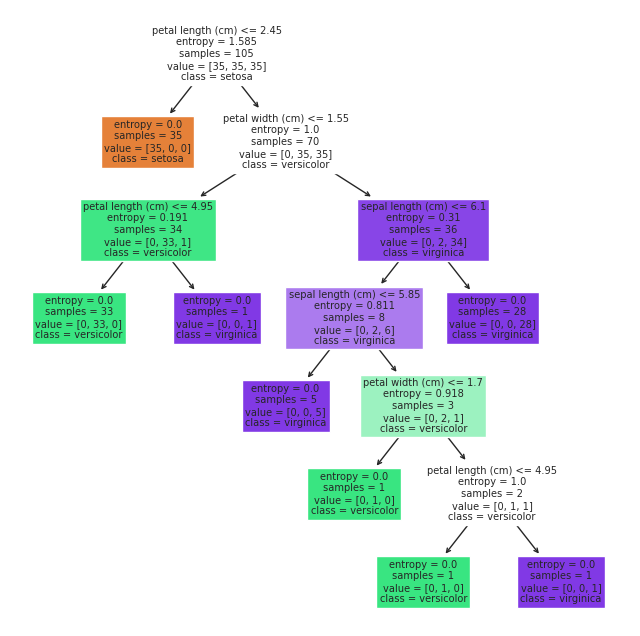

In [ ]:
plt.figure(figsize=(8,8))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True) # true sinistra, false destra
plt.show()

## Confusion matrices

A confusion matrix is a useful tool for evaluating the performance of a classifier in machine learning. It is a table that compares the predicted labels of a classifier with the actual labels of the data. The confusion matrix provides a detailed breakdown of the true positive, false positive, true negative, and false negative predictions made by the classifier.

Here are some situations where a confusion matrix can be particularly useful:

* In binary classification problems, a confusion matrix can be used to evaluate the performance of a classifier by calculating metrics such as accuracy, precision, and recall.
* To identify the types of errors made by a classifier, such as false positives and false negatives. This information can be used to improve the classifier by understanding where it is making mistakes and how to address them.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]])

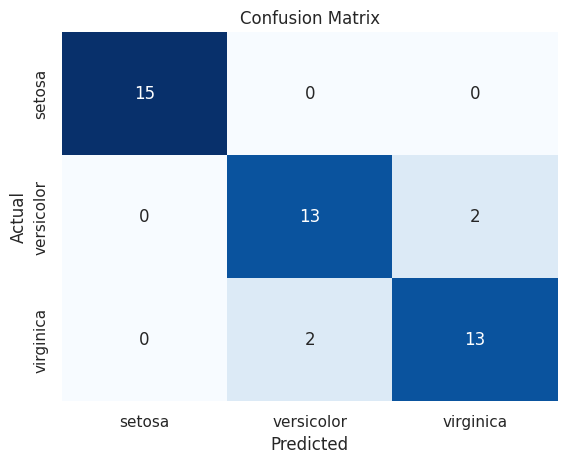

In [ ]:
class_names = iris.target_names

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar = False)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
_ = plt.title('Confusion Matrix')

## When to use max-pooling?

Max pooling is a technique used in deep learning for feature extraction and downsampling of input data. It is commonly used in convolutional neural networks (CNNs) to reduce the dimensionality of the feature maps and to extract the most important features.

In max pooling, a sliding window (also known as a pooling window) of fixed size is moved over the input feature map, and the maximum value within each window is taken as the output. The size of the window and the stride of the sliding are hyperparameters that can be adjusted to control the degree of pooling and downsampling.

Benefits:

* It helps to reduce the dimensionality of the feature maps, which can help to prevent overfitting and reduce computational complexity.
* It can help to extract the most important features from the input data, which can improve the accuracy of the model.
* It can introduce a degree of translation invariance, since the max pooling operation is invariant to small translations of the input.

However, max pooling also has some drawbacks, such as a loss of information and a potential for information compression, which can be mitigated by using other techniques such as average pooling, strided convolutions, or dilated convolutions.

**Example**  
In an image, max pooling selects the brighter pixels from an image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example in the MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used.

## Effects of batch size

The batch size is an important hyperparameter in deep learning that determines the number of samples that are processed in each training iteration. Some effects of batch size include:

* Computational efficiency: A larger batch size typically leads to faster training, as it allows for more efficient use of hardware resources. This is because processing larger batches takes advantage of the parallelism of modern hardware, allowing for faster computation of gradients.
* Accuracy and generalization: In some cases, using a larger batch size can lead to better generalization and higher accuracy on the validation set, as it reduces the variance in the gradient estimates. This is because the larger batch size provides a more accurate estimate of the true gradient, which can help the model converge to a better minimum.
* Convergence speed: Smaller batch sizes may require more iterations to converge, as the gradients computed on small batches can be noisy and cause the optimization process to oscillate. However, using a larger batch size may cause the model to converge too quickly to a suboptimal solution, particularly if the learning rate is too high.
* Memory usage: Using a larger batch size requires more memory to store the intermediate activations and gradients during backpropagation, which can be a constraint on limited hardware resources. This is particularly true for large models with many layers and parameters.

In general, the choice of batch size depends on several factors such as the size of the dataset, the complexity of the model, the amount of available hardware resources, and the specific optimization algorithm being used.

Good sizes are usually powers of 2, generally $16 \le batch \le 1024$.